In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving User_Data - User_Data.csv to User_Data - User_Data (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('User_Data - User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X=df.iloc[:,2:4]
Y=df.iloc[:,4:5]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
X_= (X - X.mean())/X.std()
X_


,Age,EstimatedSalary
0,-1.779569,-1.488183
1,-0.253270,-1.458854
2,-1.111813,-0.784307
3,-1.016419,-0.373714
4,-1.779569,0.183521
...,...,...
395,0.796060,-0.842964
396,1.273028,-1.370870
397,1.177635,-1.458854
398,-0.157877,-1.077589


In [ ]:
ones=np.ones([X_.shape[0],1]) #means no of rows as in X and column=1
X_=np.concatenate((ones,X_),axis=1)
theta_=np.zeros([1,X_.shape[1]]) 
Y=np.array(Y)

In [ ]:
X_

array([[ 1.        , -1.77956879, -1.48818251],
       [ 1.        , -0.25327018, -1.45885438],
       [ 1.        , -1.11181315, -0.78430745],
       ...,
       [ 1.        ,  1.17763477, -1.45885438],
       [ 1.        , -0.15787651, -1.07758873],
       [ 1.        ,  1.08224111, -0.98960434]])

In [ ]:
theta_

array([[0., 0., 0.]])

In [ ]:
def sigmoid(x):
  return(1/(1+np.exp(-x)))

def func(theta,X_):
  return(np.dot(X_,(theta.T)))

def probability(theta,X_):
  return sigmoid(func(theta,X_))

In [ ]:
def costfunc(X_,Y,theta):
  N=len(X_)
  total_cost = -(1 / N) * np.sum(Y * np.log(probability(theta, X_)) + (1 - Y) * np.log(1 - probability(theta, X_)))
  return total_cost

In [ ]:
def logistic_regression(X_,Y,theta,alpha,epochs):
  total_cost=np.zeros(epochs)
  for i in range(epochs):
    val=probability(theta,X_)
    # print("val",val)
    theta=theta-((alpha/len(X_))*np.sum(X_*(val-Y),axis=0))
    # print(theta)
    total_cost[i]=costfunc(X_,Y,theta)
  return theta,total_cost

In [ ]:
theta,total_cost = logistic_regression(X_,Y,theta_,alpha=1,epochs=10000)
total_cost

array([0.57308287, 0.50777164, 0.46861943, ..., 0.34631423, 0.34631423,
       0.34631423])

In [ ]:
theta

array([[-1.13812197,  2.44764101,  1.22411286]])

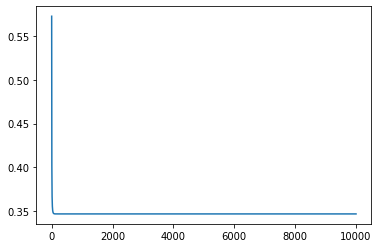

In [ ]:
plt.plot(total_cost)

In [ ]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


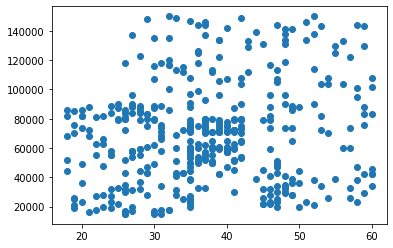

In [ ]:
plt.scatter(X['Age'],X['EstimatedSalary'] )

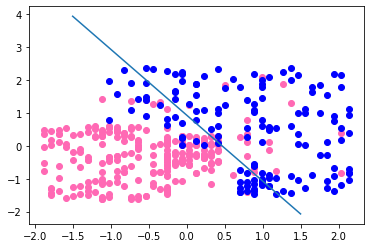

In [ ]:
def eqn_of_line(x, w1, w2, w3):
  return (-w1 - w2*x)/w3

w1, w2, w3 = theta[0]
plt.scatter(a0, b0, color = 'hotpink')
plt.scatter(a1, b1, color = 'blue')
plt.plot([-1.5, 1.5], [eqn_of_line(-1.5, w1, w2, w3), eqn_of_line(1.5, w1, w2, w3)])